### **Clase 4 - Variables aleatorias y gráficos**

#### **`Analizando el Índice de Desarrollo Humano`**

En esta primera parte analizaremos el Índice de Desarrollo Humano de los países. Fue creado por el Programa de las Naciones Unidas para el Desarrollo buscando generar una medición alternativa para el desarrollo de un país, en oposición a las mediciones clásicas como el crecimiento económico.

Este índice es un resumen de la facilidad de un país en entregarle a sus habitantes una vida larga y saludable, una educación de calidad que les permita comprender su entorno y tener un nivel de vida decente.

La dimensión de la salud se mide por la esperanza de vida al nacer, la educación se mide mediante el promedio de años de escolaridad en la población sobre los 25 años y la cantidad esperada de años de escolaridad en la población infantil. La dimensión del nivel de vida se mide con el producto nacional bruto per cápita. Estas dimensiones posteriormente son normalizadas y promediadas.

El índice va entre 0 (nivel de desarrollo humano precario) a 1 (nivel de desarrollo humano perfecto).

##### **1 - Importar librerias y carga de archivo**

In [2]:
# %matplotlib auto --> me tira los graficos en una pantalla externa al notebook
# %matplotlib inline --> me tira los graficos dentro del notebook
%matplotlib inline

# Importamos la triada de Data Science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importamos scipy.stats que ayudará a generar distribuciones
import scipy.stats as stats

# Archivos con funciones de visualizacion
import lec3_graphs as gfx

# Estilo de los gráficos
plt.style.use('seaborn-whitegrid') # Graficos estilo seaborn
plt.rcParams["figure.figsize"] = (10,6) # Tamaño gráficos

In [1]:
import os

os.listdir()

['Clase 4 - Variables Aleatorias y gráficos.pdf',
 'clase_4_-_variables_aleatorias_y_graficos.ipynb',
 'clase_4_practica.ipynb',
 'lec3_graphs.py',
 'qog_std_cs_jan18.csv']

In [3]:
df = pd.read_csv('qog_std_cs_jan18.csv')
df.shape

(194, 1882)

In [7]:
df.head(10)

,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relacc,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust
0,4,Afghanistan,AFG,700.0,4.0,QoGStdCSJan18,NaN,NaN,29.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,Albania,ALB,339.0,8.0,QoGStdCSJan18,NaN,NaN,26.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,Algeria,DZA,615.0,12.0,QoGStdCSJan18,NaN,NaN,21.0,6.0,...,3.710616,1.704692,3.681347,5.988125,6.301029,5.339371,3.805579,-0.409807,-0.498164,0.179286
3,20,Andorra,AND,232.0,20.0,QoGStdCSJan18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,Angola,AGO,540.0,24.0,QoGStdCSJan18,NaN,NaN,22.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,28,Antigua and Barbuda,ATG,58.0,28.0,QoGStdCSJan18,NaN,NaN,11.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,31,Azerbaijan,AZE,373.0,31.0,QoGStdCSJan18,NaN,NaN,25.0,15.0,...,2.922372,2.025111,2.305843,5.581910,6.662893,4.948389,3.753472,-0.667609,-0.416085,0.152803
7,32,Argentina,ARG,160.0,32.0,QoGStdCSJan18,NaN,NaN,23.0,7.0,...,1.850180,2.163982,2.091454,6.517899,7.488213,6.504242,3.989496,0.161507,-0.103415,0.198548
8,36,Australia,AUS,900.0,36.0,QoGStdCSJan18,134.0,2.866382e+09,NaN,NaN,...,1.606337,2.209082,1.755517,6.321970,7.203336,4.063055,4.069681,1.044364,0.422270,0.518140
9,40,Austria,AUT,305.0,40.0,QoGStdCSJan18,103.0,3.775100e+08,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### **2- Analizar estadisticos de la columna `undp_hdi`**

Al ejecutar **`describe() `** en la **`Serie`** se obtiene una media de **`0.69`**, por lo que podemos decir que a nivel global el nivel de desarrollo está por sobre el punto de desarrollo medio (**`0.5`**), el nivel de desarrollo a nivel mundial se acerca más a ser '**`bueno`**'. El valor mínimo registrado es de **`0.347`**, substancialmente inferior a la media global, mientras que el valor máximo es de **`0.948`**. Hay que considerar que describe informa que hay **`186`** observaciones con valores registrados, que no concuerdan con las **`194`** observaciones originales.

In [5]:
df['undp_hdi'].describe().round(3)

count    186.000
mean       0.696
std        0.155
min        0.347
25%        0.567
50%        0.726
75%        0.805
max        0.948
Name: undp_hdi, dtype: float64

##### **3- Filtrar aquellos registros que tienen valor nulo en la columna **`undp_hdi`****

La mayoría de los países corresponden a protectorados o países con situación gubernamental anómala. Estos países tienden a no tener los suficientes recursos como para invertir en institutos de estadísticas gubernamentales.

Para excluirlos de los datos, pandas ofrece el método **`dropna()`**. Funciona tanto en los **`DataFrame`** como en las **`Series`**. Hay que destacar que utilizar **`dropna()`** en DataFrame requiere un poco más de cautela en el mecanismo de omisión de datos.


In [6]:
df.loc[df['undp_hdi'].isnull()]

,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relacc,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust
37,158,Taiwan,TWN,713.0,158.0,QoGStdCSJan18,28.0,32709472.0,NaN,NaN,...,1.950127,2.490061,2.072234,6.391475,6.896482,5.671831,4.112848,-0.18797,0.759673,0.30888
89,408,"Korea, North",PRK,731.0,408.0,QoGStdCSJan18,NaN,NaN,18.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,492,Monaco,MCO,221.0,492.0,QoGStdCSJan18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,520,Nauru,NRU,970.0,520.0,QoGStdCSJan18,NaN,NaN,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,584,Marshall Islands,MHL,983.0,584.0,QoGStdCSJan18,NaN,NaN,9.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,674,San Marino,SMR,331.0,674.0,QoGStdCSJan18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,706,Somalia,SOM,520.0,706.0,QoGStdCSJan18,NaN,NaN,25.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,798,Tuvalu,TUV,947.0,798.0,QoGStdCSJan18,NaN,NaN,8.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Antes de eliminar registros, podemos revisar que registros poseen nulos en la columna **`undp_hdi`**

In [7]:
df.loc[df['undp_hdi'].isnull()].cname.unique()

array(['Taiwan', 'Korea, North', 'Monaco', 'Nauru', 'Marshall Islands',
       'San Marino', 'Somalia', 'Tuvalu'], dtype=object)

In [8]:
df.loc[df['undp_hdi'].isnull()].cname.to_list()

['Taiwan',
 'Korea, North',
 'Monaco',
 'Nauru',
 'Marshall Islands',
 'San Marino',
 'Somalia',
 'Tuvalu']

##### **4- Crear un Histograma utilizando la columna **`undp_hdi`****

Cuando buscamos visualizar cómo se comporta una variable contínua, una de las formas exploratorias más comunes es mediante un histograma, que es una representación de la distribución empírica de la variable.

Para ello haremos uso de **`matplotlib`**, una librería orientada a "hacer fácil las cosas fáciles y posibles las cosas imposibles" mediante una sintaxis clara y concisa respecto a la forma en que se pasan argumentos y se pueden modificar gráficos. Está bien integrado con **`pandas`** y **`numpy`**, facilitando la interacción entre estos elementos.

Para generar un histograma, los valores continuos se agrupan en casillas (bins) y posteriormente se cuentan la cantidad de observaciones dentro de cada casilla. El comportamiento de matplotlib por defecto es calcular de forma automática las casillas.

Si observamos el histograma índice de desarrollo humano, en el **`eje X`** encontramos el **`rango de valores de la variable`**, y en el **`eje Y`** encontramos la **`frecuencia`** (la cantidad de repeticiones).

Existe una gran cantidad de casos con un índice de desarrollo humano igual o superior a 0.70, pero también encontramos otro grupo de observaciones con valores cercanos a 0.50. Este gráfico revela algo que ya sabíamos: existe el mundo desarrollado y el mundo subdesarrollado.

- De esta forma podrias eliminar las filas del Dataframe que tienen nulos en la columna **`undp_hdi`**

In [9]:
df.dropna(subset=['undp_hdi'])

,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relacc,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust
0,4,Afghanistan,AFG,700.0,4.0,QoGStdCSJan18,NaN,NaN,29.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,Albania,ALB,339.0,8.0,QoGStdCSJan18,NaN,NaN,26.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,Algeria,DZA,615.0,12.0,QoGStdCSJan18,NaN,NaN,21.0,6.0,...,3.710616,1.704692,3.681347,5.988125,6.301029,5.339371,3.805579,-0.409807,-0.498164,0.179286
3,20,Andorra,AND,232.0,20.0,QoGStdCSJan18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,Angola,AGO,540.0,24.0,QoGStdCSJan18,NaN,NaN,22.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,860,Uzbekistan,UZB,704.0,860.0,QoGStdCSJan18,NaN,NaN,21.0,16.0,...,3.247667,2.191377,2.171875,4.076407,7.888145,5.364856,3.950634,NaN,NaN,0.140921
190,862,Venezuela,VEN,101.0,862.0,QoGStdCSJan18,NaN,NaN,20.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,882,Samoa,WSM,990.0,882.0,QoGStdCSJan18,NaN,NaN,10.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,887,Yemen,YEM,679.0,887.0,QoGStdCSJan18,NaN,NaN,26.0,16.0,...,3.598178,1.697442,3.752032,4.671357,5.887310,3.384707,3.892000,-0.591479,-0.875164,0.403987


Y puedo comparar las filas que tenia en un principio con las que acabo de eliminar

In [10]:
df.shape, df.dropna(subset=['undp_hdi']).shape

((194, 1882), (186, 1882))

Vamos a trabajar con la serie de la columna **`undp_hdi`**: 

In [39]:
hdi_dropna = df.dropna(subset=['undp_hdi'])['undp_hdi']

In [12]:
hdi_dropna = df['undp_hdi'].dropna()

In [13]:
hdi_dropna

0      0.479
1      0.762
2      0.743
3      0.857
4      0.531
       ...  
189    0.697
190    0.769
191    0.702
192    0.499
193    0.576
Name: undp_hdi, Length: 186, dtype: float64

Calculamos la distribucion

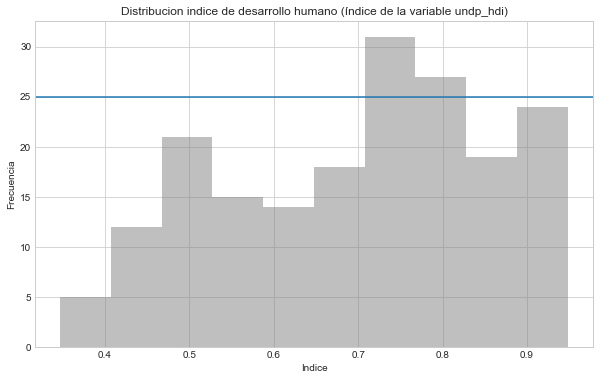

In [14]:
# alpha es un factor de transparencia
plt.hist(hdi_dropna, color='grey', alpha=.5)

# Titulo
plt.title('Distribucion indice de desarrollo humano (índice de la variable undp_hdi)')

# Etiquetas
plt.xlabel('Indice')
plt.ylabel('Frecuencia')

# Linea horizontal paralela al eje x
plt.axhline(25)

##### **5- Calcular medias de la columna `undp_hdi` a nivel de grupo continente y plotearlo en un gráfico de puntos**

Ya caracterizando la media del índice de desarrollo humano, **`estamos interesados en ver los niveles de desarrollo en distintas regiones`**. Para ello necesitamos calcular las medias a nivel de grupo y posteriormente graficarlas.

Vamos a agrupar valores

**`Forma 1`**

In [15]:
hdi_group = df.loc[:, ['cname', 'ccode', 'undp_hdi', 'ht_region']]
hdi_group.shape

(194, 4)

**ht_region** = numero que indica el continente que pertenece cada pais

In [16]:
hdi_group

,cname,ccode,undp_hdi,ht_region
0,Afghanistan,4,0.479,8
1,Albania,8,0.762,1
2,Algeria,12,0.743,3
3,Andorra,20,0.857,5
4,Angola,24,0.531,4
...,...,...,...,...
189,Uzbekistan,860,0.697,1
190,Venezuela,862,0.769,2
191,Samoa,882,0.702,9
192,Yemen,887,0.499,3


In [17]:
hdi_group['region_recod'] = hdi_group['ht_region'].replace([1,2,3,4,5,6,7,8,9,10],['EastEurope', 'LatAm', 'NorthAfrica','SubSaharian', 'WesternDem', 'EastAsia','SouthEastAsia','SouthAsia','Pacific','Caribbean'])
hdi_group

,cname,ccode,undp_hdi,ht_region,region_recod
0,Afghanistan,4,0.479,8,SouthAsia
1,Albania,8,0.762,1,EastEurope
2,Algeria,12,0.743,3,NorthAfrica
3,Andorra,20,0.857,5,WesternDem
4,Angola,24,0.531,4,SubSaharian
...,...,...,...,...,...
189,Uzbekistan,860,0.697,1,EastEurope
190,Venezuela,862,0.769,2,LatAm
191,Samoa,882,0.702,9,Pacific
192,Yemen,887,0.499,3,NorthAfrica


In [18]:
group_mean = round(hdi_group.groupby('region_recod')['undp_hdi'].mean(),2)
group_mean

region_recod
Caribbean        0.74
EastAsia         0.82
EastEurope       0.78
LatAm            0.72
NorthAfrica      0.75
Pacific          0.64
SouthAsia        0.61
SouthEastAsia    0.70
SubSaharian      0.51
WesternDem       0.90
Name: undp_hdi, dtype: float64

Y con estos datos agrupados vamos a plotear

Text(0.5, 1.0, 'Indice de desarrollo por zona geografica')

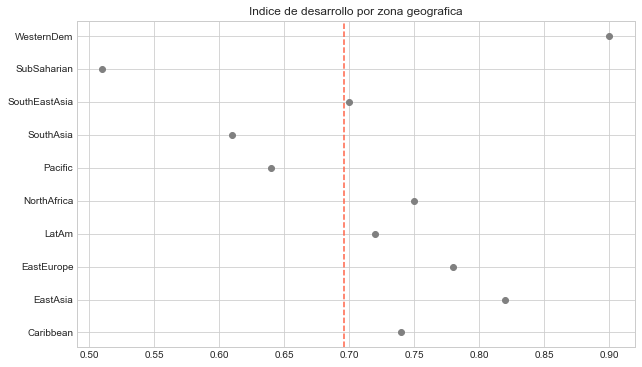

In [19]:
# El 'o' nos muestra los puntos del grafico

plt.plot(group_mean.values, group_mean.index, 'o', color='grey')

plt.axvline(hdi_group['undp_hdi'].mean(), color = 'tomato', linestyle ='--')

plt.title('Indice de desarrollo por zona geografica')


Nuestro gráfico aclara el hecho que en promedio las democracias avanzadas (**`Europa Occidental`** y **`Estados Unidos`**, **`Canadá`** y **`Australia`**) alcanza niveles de desarrollo humano sobre el **`0.90`**. A diferencia, las regiones donde la vida es más precaria e inestable es el **`África Subsahariana`** y las **`Islas del Pacífico`**.

**`Forma 2`**

In [20]:
hdi_group = round(df.groupby('ht_region')['undp_hdi'].mean(),2)
hdi_group

ht_region
1     0.78
2     0.72
3     0.75
4     0.51
5     0.90
6     0.82
7     0.70
8     0.61
9     0.64
10    0.74
Name: undp_hdi, dtype: float64

In [21]:
valores_nuevos = ['EastEurope', 'LatAm', 'NorthAfrica','SubSaharian', 'WesternDem', 'EastAsia','SouthEastAsia','SouthAsia','Pacific','Caribbean']

hdi_group.index = valores_nuevos

(hdi_group)

EastEurope       0.78
LatAm            0.72
NorthAfrica      0.75
SubSaharian      0.51
WesternDem       0.90
EastAsia         0.82
SouthEastAsia    0.70
SouthAsia        0.61
Pacific          0.64
Caribbean        0.74
Name: undp_hdi, dtype: float64

Y con estos datos agrupados vamos a plotear

Text(0.5, 1.0, 'Indice de desarrollo por zona geografica')

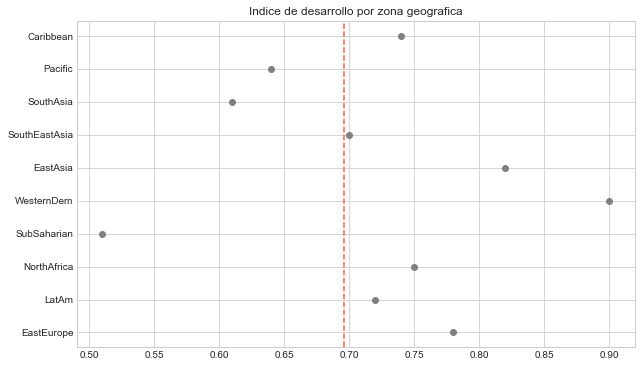

In [22]:
plt.plot(hdi_group.values, hdi_group.index, 'o', color='grey')

plt.axvline(df['undp_hdi'].mean(), color = 'tomato', linestyle ='--')

plt.title('Indice de desarrollo por zona geografica')


##### **6 - Distribución normal**

Resulta que el índice de desarrollo humano (y toda medición empírica), tiende a responder a ciertas leyes respecto a su comportamiento. Estos es resumen en variables aleatorias, que definen los posibles valores asociados a una distribución probabilística.

Para nuestro ejemplo, el índice de desarrollo humano tiene una distribución aproximadamente normal.


**¿Y cómo comprobamos la normalidad de una variable?**

Podemos inspeccionar qué tanto se acopla el histograma a la distribución normal al incluir la media y varianza de **`hdi_dropna`**.

La distribución normal (o Gaussiana) es una de las distribuciones más utilizadas para modelar eventos contínuos. Fenómenos como la altura y peso de una población, así como los puntajes PSU o las notas de una clase **se comportan de manera aproximadamente normal**. Para el caso de una sola variable , depende de dos parámetros: la **`media`** (representada como **`𝜇`**) y **`varianza`** (representada como **`σ2`** ).

El parámetro **`media`** gobierna el punto donde se concentra la mayoría de los datos. Ésta sigue la definición de las medidas de tendencia central.

El parámetro **`varianza`** representa qué tan concentrados están los datos en torno a la media.

In [23]:
print("La media es: ", round(hdi_dropna.mean(), 3)) 
print("La varianza es: ", round(np.var(hdi_dropna), 3))

La media es:  0.696
La varianza es:  0.024


Si la media es de **`0.696`** y la varianza es de **`0.02`**, podemos analizar si la distribución empírica del índice de desarrollo humano sigue la distribución normal: 
```
Xi ~ N (0.696, 0.024**2)
```

Para superponer la curva gaussiana a nuestro histograma, utilizamos las siguientes líneas de código:

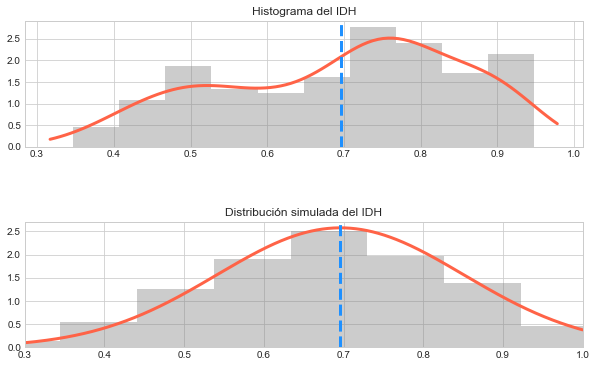

In [22]:
# Generamos el primer espacio para el primer histograma
plt.subplot(2,1,1)

# Graficamos el mismo histograma, especificando 'density' para que el histograma represente densidades y no frecuencias 
plt.hist(hdi_dropna, color='grey', alpha=.4, density=True) 

# extraemos los límites del histograma 
x_min, x_max = plt.xlim()

# print(x_min) ==> 0.31694999949999997
# print(x_max) ==> 0.9780500105

# utilizandos los límites del histograma para crear un array 
x_axis = np.linspace(x_min, x_max, 100)

# print(x_axis) ==> [0.31695    0.32362778 0.33030556 0.33698333 0.34366111 0.35033889 0.35701667 
#                    0.36369444 0.37037222 0.37705    0.38372778 0.39040556 0.39708333 0.40376111 
#                    0.41043889 0.41711667 0.42379445 0.43047222 0.43715    0.44382778 0.45050556 
#                    0.45718334 0.46386111 0.47053889 0.47721667 0.48389445 0.49057222 0.49725    
#                    0.50392778 0.51060556 0.51728334 0.52396111 0.53063889 0.53731667 0.54399445 
#                    0.55067223 0.55735    0.56402778 0.57070556 0.57738334 0.58406112 0.59073889
#                    0.59741667 0.60409445 0.61077223 0.61745    0.62412778 0.63080556 0.63748334 
#                    0.64416112 0.65083889 0.65751667 0.66419445 0.67087223 0.67755001 0.68422778 
#                    0.69090556 0.69758334 0.70426112 0.71093889 0.71761667 0.72429445 0.73097223 
#                    0.73765001 0.74432778 0.75100556 0.75768334 0.76436112 0.7710389  0.77771667 
#                    0.78439445 0.79107223 0.79775001 0.80442779 0.81110556 0.81778334 0.82446112 
#                    0.8311389  0.83781667 0.84449445 0.85117223 0.85785001 0.86452779 0.87120556
#                    0.87788334 0.88456112 0.8912389  0.89791668 0.90459445 0.91127223 0.91795001 
#                    0.92462779 0.93130557 0.93798334 0.94466112 0.9513389  0.95801668 0.96469445 
#                    0.97137223 0.97805001]

# graficamos la curva de densidad empirica (permite comparar directamente con la curva de densidad teorica)
gauss_kde = stats.gaussian_kde(hdi_dropna) # Kernel gaussiano 

# forma de matriz con n filas (gauss_kde(x_axis).T) y 100 columnas (x_axis.shape)
z = np.reshape(gauss_kde(x_axis).T, x_axis.shape) 

# print(gauss_kde(x_axis)) ==> [0.16925243 0.19899276 0.2321638  0.26882301 0.30896171 0.35249701
#                               0.39926697 0.44902939 0.50146515 0.55618595 0.61274597 0.6706565
#                               0.72940198 0.7884558  0.84729417 0.90540677 0.9623034  1.01751673
#                               1.07060185 1.12113421 1.16870754 1.21293388 1.25344713 1.28991098
#                               1.32203135 1.34957241 1.37237457 1.39037228 1.40360936 1.41224979
#                               1.41658253 1.41701954 1.41408736 1.40841288 1.40070509 1.3917343
#                               1.38231081 1.37326438 1.36542555 1.35960937 1.35660139 1.35714549
#                               1.36193282 1.37159091 1.38667217 1.40764115 1.43486016 1.46857336
#                               1.50888963 1.55576499 1.60898582 1.66815417 1.73267688 1.80176038
#                               1.8744127  1.94945439 2.02553956 2.10118746 2.17482481 2.24483775
#                               2.30963162 2.36769609 2.41767181 2.45841479 2.48905381 2.50903663
#                               2.51816074 2.51658548 2.5048234  2.48371007 2.45435337 2.41806483
#                               2.37627715 2.33045337 2.28199396 2.23214853 2.18193857 2.13209716
#                               2.08303008 2.03480135 1.98714448 1.93949861 1.89106696 1.84089325
#                               1.78795046 1.73123506 1.66985983 1.60313789 1.53065165 1.45230126
#                               1.36832912 1.27931853 1.1861672  1.09003812 0.99229233 0.89440949
#                               0.79790295 0.70423635 0.61474801 0.53058846]

# print(gauss_kde(x_axis).T) ==> [0.16925243 0.19899276 0.2321638  0.26882301 0.30896171 0.35249701
#                                 0.39926697 0.44902939 0.50146515 0.55618595 0.61274597 0.6706565
#                                 0.72940198 0.7884558  0.84729417 0.90540677 0.9623034  1.01751673
#                                 1.07060185 1.12113421 1.16870754 1.21293388 1.25344713 1.28991098
#                                 1.32203135 1.34957241 1.37237457 1.39037228 1.40360936 1.41224979
#                                 1.41658253 1.41701954 1.41408736 1.40841288 1.40070509 1.3917343
#                                 1.38231081 1.37326438 1.36542555 1.35960937 1.35660139 1.35714549
#                                 1.36193282 1.37159091 1.38667217 1.40764115 1.43486016 1.46857336
#                                 1.50888963 1.55576499 1.60898582 1.66815417 1.73267688 1.80176038
#                                 1.8744127  1.94945439 2.02553956 2.10118746 2.17482481 2.24483775
#                                 2.30963162 2.36769609 2.41767181 2.45841479 2.48905381 2.50903663
#                                 2.51816074 2.51658548 2.5048234  2.48371007 2.45435337 2.41806483
#                                 2.37627715 2.33045337 2.28199396 2.23214853 2.18193857 2.13209716
#                                 2.08303008 2.03480135 1.98714448 1.93949861 1.89106696 1.84089325
#                                 1.78795046 1.73123506 1.66985983 1.60313789 1.53065165 1.45230126
#                                 1.36832912 1.27931853 1.1861672  1.09003812 0.99229233 0.89440949
#                                 0.79790295 0.70423635 0.61474801 0.53058846]

# print(x_axis.shape) ==> 100

# print(z) ==> [0.16925243 0.19899276 0.2321638  0.26882301 0.30896171 0.35249701
#               0.39926697 0.44902939 0.50146515 0.55618595 0.61274597 0.6706565
#               0.72940198 0.7884558  0.84729417 0.90540677 0.9623034  1.01751673
#               1.07060185 1.12113421 1.16870754 1.21293388 1.25344713 1.28991098
#               1.32203135 1.34957241 1.37237457 1.39037228 1.40360936 1.41224979
#               1.41658253 1.41701954 1.41408736 1.40841288 1.40070509 1.3917343
#               1.38231081 1.37326438 1.36542555 1.35960937 1.35660139 1.35714549
#               1.36193282 1.37159091 1.38667217 1.40764115 1.43486016 1.46857336
#               1.50888963 1.55576499 1.60898582 1.66815417 1.73267688 1.80176038
#               1.8744127  1.94945439 2.02553956 2.10118746 2.17482481 2.24483775
#               2.30963162 2.36769609 2.41767181 2.45841479 2.48905381 2.50903663
#               2.51816074 2.51658548 2.5048234  2.48371007 2.45435337 2.41806483
#               2.37627715 2.33045337 2.28199396 2.23214853 2.18193857 2.13209716
#               2.08303008 2.03480135 1.98714448 1.93949861 1.89106696 1.84089325
#               1.78795046 1.73123506 1.66985983 1.60313789 1.53065165 1.45230126
#               1.36832912 1.27931853 1.1861672  1.09003812 0.99229233 0.89440949
#               0.79790295 0.70423635 0.61474801 0.53058846]


plt.plot(x_axis, z, color='tomato', lw=3)

# agregamos la línea vertical para identificar la media 
plt.axvline(hdi_dropna.mean(), color='dodgerblue', linestyle='--', lw=3) 
plt.title("Histograma del IDH")

#######################################################################################
# Datos aleatorios normalizados utilizando la media (mu) y la desviacion estandar (sigma)

# El segundo gráfico 
plt.subplot(2, 1, 2)

# Simulamos cómo debería comportarse un histograma normal
media = 0.696
desv = np.sqrt(0.024)
datos_normal = np.random.normal(media, desv, 1000)

plt.hist(datos_normal, color='grey', alpha=.4, density=True)

# Fijamos los límites del eje x 
plt.xlim(0.3, 1)

# Generamos una lista entre:
x_axis = np.linspace(0.3, 1, 1000)
y_axis = stats.norm.pdf(x_axis, media, desv)

plt.plot(x_axis, y_axis, color='tomato', lw=3)
plt.axvline(media, color='dodgerblue', linestyle='--', lw=3) 
plt.title("Distribución simulada del IDH") 
plt.subplots_adjust(hspace=0.6)

La figura de arriba presenta el histograma del índice de desarrollo humano, y la figura de abajo representa la simulación de una variable distribuida normal con la media y varianza de la variable. La recta azul indica la media de 0.696, y la curva roja representa la distribución normal.

Mientras que en el gráfico de arriba los puntajes no se acoplan de forma exacta a la curva y la media, la figura de la distribución simulada presenta el comportamiento esperado.

Cabe destacar que el comportamiento descrito en el histograma de la variable no descarta la utilización de la distribución normal como una ley para resumir el comportamiento.

**`¿Qué podemos esperar de los parámetros de una distribución normal?`**

Ya teniendo una primera aproximación a la distribución normal, generamos varias situaciones para comparar su comportamiento. En la figura creada con **`gfx.normal_distributions()`** se presentan tres casos donde tanto media como varianza cambian de valor:

-	La distribución normal estandarizada, que representa el caso donde la media es **`0`** y la varianza es de **`1`**. Se utiliza como benchmark para realizar comparaciones.
-	Una distribución donde la media es de **`0`** y su varianza es de **`0.5`**.
-	Una distribución donde la media es de **`-1`** y su varianza es **`1`**.

Consideremos el caso de comparación. Dado que la media es **`0`**, la cúspide de la distribución se concentrará entorno a este valor. Comparado a la curva con menor varianza que si bien presenta la cúspide en **`0`**, tiene a presentar una mayor densidad dado que la menor varianza conlleva a concentrar una mayor cantidad de información alrededor de la media. Si bien la curva verde presenta forma idéntica a la normal estandarizada, su cúspide se centra en **`-1`** a diferencia de la normal estandarizada.

En el lado derecho se visualizan las densidades acumuladas de las simulaciones. La función acumulada expresa el porcentaje de datos hasta cierto punto del rango. Observamos que cuando **`x=0`**, la función acumulada de la distribución normal estandarizada es cercana al **`50%`**, mientras que para la distribución con menor media es cercana al **`90%`**. De similar manera, el **`50%`** de la información en la simulación con una menor media se alcanza en **`-1`**.


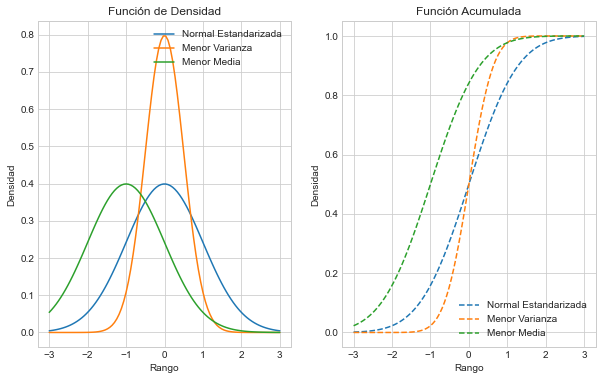

In [3]:
gfx.normal_distributions()

#### **`Analizando el Producto interno bruto per capita de los paises`**

- El PBI (producto bruto interno) o PIB (producto interno bruto) es un indicador económico que muestra el valor total de bienes y servicios que se han generado en el ámbito económico durante un período de tiempo, en general, durante un año.

- Este conforma uno de los principales indicadores para medir el aumento de la producción de organizaciones de un país, lo cual refleja su nivel económico.

##### **1 - Importar librerias y carga de archivo**

In [14]:
# %matplotlib auto --> me tira los graficos en una pantalla externa al notebook
# %matplotlib inline --> me tira los graficos dentro del notebook
%matplotlib inline

# Importamos la triada de Data Science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importamos scipy.stats que ayudará a generar distribuciones
import scipy.stats as stats

# Archivos con funciones de visualizacion
import lec3_graphs as gfx

# Estilo de los gráficos
plt.style.use('seaborn-whitegrid') # Graficos estilo seaborn
plt.rcParams["figure.figsize"] = (10,6) # Tamaño gráficos

In [5]:
import os

os.listdir()

['Clase 4 - Variables Aleatorias y gráficos.pdf',
 'clase_4_-_variables_aleatorias_y_graficos.ipynb',
 'clase_4_practica.ipynb',
 'lec3_graphs.py',
 'qog_std_cs_jan18.csv',
 '__pycache__']

In [6]:
df = pd.read_csv('qog_std_cs_jan18.csv')
df.shape

(194, 1882)

In [7]:
df.head(10)

,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relacc,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust
0,4,Afghanistan,AFG,700.0,4.0,QoGStdCSJan18,NaN,NaN,29.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,Albania,ALB,339.0,8.0,QoGStdCSJan18,NaN,NaN,26.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,Algeria,DZA,615.0,12.0,QoGStdCSJan18,NaN,NaN,21.0,6.0,...,3.710616,1.704692,3.681347,5.988125,6.301029,5.339371,3.805579,-0.409807,-0.498164,0.179286
3,20,Andorra,AND,232.0,20.0,QoGStdCSJan18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,Angola,AGO,540.0,24.0,QoGStdCSJan18,NaN,NaN,22.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,28,Antigua and Barbuda,ATG,58.0,28.0,QoGStdCSJan18,NaN,NaN,11.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,31,Azerbaijan,AZE,373.0,31.0,QoGStdCSJan18,NaN,NaN,25.0,15.0,...,2.922372,2.025111,2.305843,5.581910,6.662893,4.948389,3.753472,-0.667609,-0.416085,0.152803
7,32,Argentina,ARG,160.0,32.0,QoGStdCSJan18,NaN,NaN,23.0,7.0,...,1.850180,2.163982,2.091454,6.517899,7.488213,6.504242,3.989496,0.161507,-0.103415,0.198548
8,36,Australia,AUS,900.0,36.0,QoGStdCSJan18,134.0,2.866382e+09,NaN,NaN,...,1.606337,2.209082,1.755517,6.321970,7.203336,4.063055,4.069681,1.044364,0.422270,0.518140
9,40,Austria,AUT,305.0,40.0,QoGStdCSJan18,103.0,3.775100e+08,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### **2 - Crear un Histograma con datos reales y aplicarle una Distribucion logaritmica**

Vamos a comenzar eliminando las filas del Dataframe que tienen nulos en la columna **`gle_cgdpc`**

In [10]:
gdp_dropna = df['gle_cgdpc'].dropna()

In [32]:
mu = np.mean(gdp_dropna)
mu

14279.040529635415

In [33]:
sigma = np.std(gdp_dropna)
sigma

17868.206984563905

Generaremos la **`normalización`** del gdp mediante el **`logaritmo`** 

In [20]:
log_gdp = np.log(gdp_dropna) 
print(round(log_gdp.mean() ,2))

8.85


Posteriormente grafiquemos el histograma y su curva

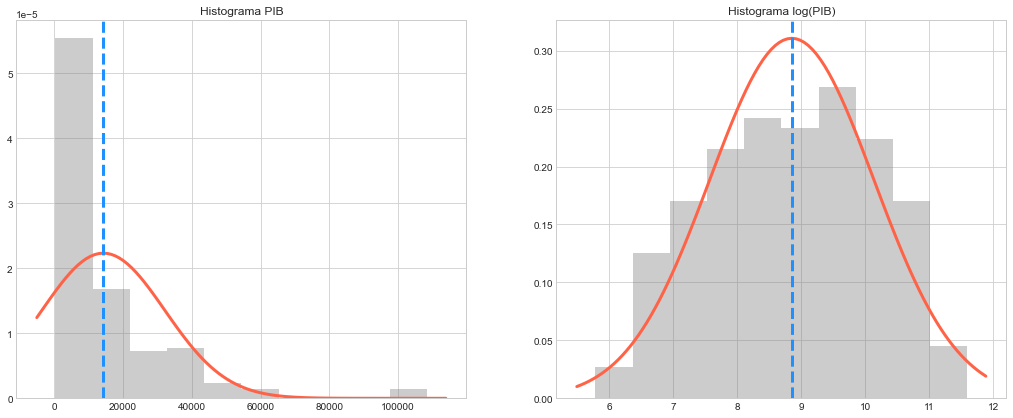

In [31]:
plt.subplot(1, 2, 1)
plt.hist(gdp_dropna, color='grey', alpha=.4, density=True) 
x_min, x_max = plt.xlim()
x_axis = np.linspace(x_min, x_max, 100) 
plt.plot(x_axis, stats.norm.pdf(x_axis, mu, sigma),color='tomato', lw=3) 
plt.axvline(gdp_dropna.mean(),color='dodgerblue', linestyle='--', lw=3)
plt.title("Histograma PIB")

plt.subplot(1, 2, 2)
plt.hist(log_gdp, color='grey', alpha=.4, density=True) 
x_min, x_max = plt.xlim()
x_axis = np.linspace(x_min, x_max, 100) 
plt.plot(x_axis, stats.norm.pdf(x_axis, log_gdp.mean(), log_gdp.std()), color='tomato', lw=3) 
plt.axvline(log_gdp.mean(), color='dodgerblue', linestyle='--', lw=3)
plt.title("Histograma log(PIB)")
plt.subplots_adjust(top = 1, right = 1.5) 

En el gráfico de la izquierda se presenta el histograma del PIB sin transformar, observamos que la distribución presenta un fuerte sesgo en valores bajos. Hay pocos países que tienen ingresos promedio de 100000 dólares o más que escapan de la media, mientras que hay una amplia mayoría de observaciones con ingresos bajo la media. Esta distribución altamente sesgada donde algunos valores se escapan de forma substancial de la muestra se puede corregir mediante la distribución lognormal.

Podemos aplicar un logaritmo al vector gdp para reescalar sus valores. En la figura de la derecha se presenta el histograma del logaritmo del PIB.

El principal contrapunto de ocupar logaritmos para transformar variables, es el hecho que sus resultados son difíciles de implementar. Por lo general sirven para desarrollar modelos de regresión donde la perturbación de los errores.

Efectivamente al reescalar la variable, los nuevos puntajes generan un histograma aproximadamente normal.

#### **`Una variante importante: La distribución normal estandarizada`**

Cuando la distribución normal tiene una media de 0 y una varianza de 1, se conoce como la distribución normal estandarizada. Dado que su media representa cero, permite reflejar diversos eventos tales como la ausencia de efecto de un estimador (distribución conocida como distribución bajo la hipótesis nula), o también cuando buscamos centrar observaciones de una variable respecto a la media (procedimiento conocido como puntajes z).

Los ejemplos anteriores sugieren la omnipresencia de la distribución normal. Dado su afabilidad para ser interpretada, cabe resaltar sus características más importantes:

-	Es **`unimodal`**, lo que implica que tiene sólo un punto que es el más alto, donde se concentran la mayoría de los datos.

-	Es **`simétrica`** dado que la mayoría de los datos gravitan alrededor de la media.

-	Es **`positiva`**, por tanto todos los valores (positivos o negativos) tienen una
probabilidad **`Pr ≥ 0`** de suceder.


Mediante los componentes paramétricos de la distribución normal podemos calcular el porcentaje de datos que estará bajo la curva. Esto se visualiza abajo con gfx.normal_distribution_sigma():

 
-	El **`68%`** de los datos se encontrarán entre **`± 1σ ⇝ Pr( − σ ≤ X ≤ + σ)`**. Esto corresponde al área de azul intenso.
 
-	El **`95%`** de los datos se encontrarán entre **`± 2σ ⇝ Pr( − 2σ ≤ X ≤ + 2σ)`**.
 
-	El **`99%`** de los datos se encontrarán entre **`± 3σ ⇝ Pr( − 3σ ≤ X ≤ + 3σ)`**. Esto corresponde a las colas de la distribución normal, con un azul pálido.

<center><img src="https://i.postimg.cc/bY13tkws/dl7.png"></center>

En la distribución normal N(μ,σ) se cumple que:

-	En el intervalo **`(μ-σ, μ+σ)`** se encuentra el **`68,26%`** del área total
-	En el intervalo **`(μ-2σ, μ+2σ)`** se encuentra el **`95,44%`** del área total
-	En el intervalo **`(μ-3σ, μ+3σ)`** se encuentra el **`99,73%`** del área total

<center><img src="https://i.postimg.cc/MZyG0dPJ/dl14.png"></center>

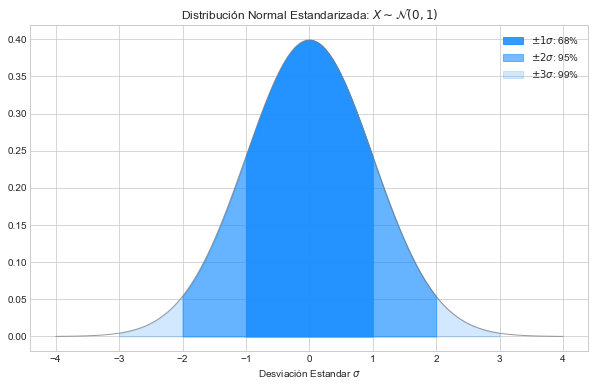

In [34]:
gfx.normal_distribution_sigma()

#### **`Puntajes Z`**

La información entregada por la distribución normal nos permite aproximar nuestro conocimiento respecto al comportamiento de la variable.

También podemos utilizar esta información para **`analizar cómo una observación en específico se comporta respecto a la media`**. Para ello utilizamos los puntajes z.

 La fórmula se detalla a continuación.

 <center><img src="https://i.postimg.cc/bNrV1Fgm/dl15.png"></center>

 El procedimiento para obtener el puntaje z de una observación implica:

**`1.`**	Obtener la media del vector donde proviene la observación.

**`2.`**	Restar la observación con la media.

**`3.`**	Dividir el resultado por la desviación estándar.

El resultado de la operación indica a cuántas desviaciones estándares se encuentra una observación respecto a la media.

##### **Ejemplo**

**`¿Cuál es el índice de desarrollo humano de Chile?`** Para ello debemos acceder a la celda específica.

Comencemos por separar la fila de Chile. Esto lo logramos mediante:

In [36]:
chile = df[df['cname'] == 'Chile']
chile.head()

,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relacc,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust
35,152,Chile,CHL,155.0,152.0,QoGStdCSJan18,NaN,NaN,22.0,7.0,...,1.909193,2.833918,2.264085,5.997994,7.269231,6.959651,3.883884,0.14309,-0.082681,0.127703


Instruímos al DataFrame para seleccionar sólo la fila que satisfaga la condición **`df['cname'] == 'Chile'`**. Posteriormente podemos acceder a la columna específica:

In [37]:
chile['undp_hdi']

35    0.845
Name: undp_hdi, dtype: float64

Resulta más conveniente concatenar todas estas acciones de manera tal de escribir código más sucinto (a expensas de hacerlo un poco más inentendible).

In [48]:
hdi_chile = df[df['cname']=='Chile']['undp_hdi'] 
hdi_chile

35    0.845
Name: undp_hdi, dtype: float64

In [49]:
print(f'hdi Chile: %.3f' %hdi_chile)
print('hdi medio a nivel mundial: %.3f' %round(hdi_dropna.mean(),3))

hdi Chile: 0.845
hdi medio a nivel mundial: 0.696


Una forma rudimentaria de calcular el puntaje-z de Chile es la siguiente, donde aplicamos los componentes detallados en la fórmula. Con un valor final de 0.96, observamos que Chile se posiciona casi una desviación estandar respecto al promedio mundial del índice de desarrollo humano.

In [41]:
print('Puntaje Z para Chile: %.2f' %((hdi_chile - hdi_dropna.mean()) / np.sqrt(hdi_dropna.var())))

Puntaje Z para Chile: 0.96


Ya sabemos desarrollar funciones, y podemos generalizar todo este procedimiento para calcular el puntaje z de cualquier país respecto a cualquier variable. Para este ejemplo, vamos a seguir analizando el índice de desarrollo humano.

In [52]:
def get_zscore(col, case):
    get_point = df[df['cname']==case][col] 
    preproc = df[col].dropna()
    get_mean = preproc.mean() 
    get_std = np.sqrt(preproc.var())
    return (get_point - get_mean) / get_std

Como ya sabemos, la prueba de fuego de una función es que replique el mismo resultado que la versión rudimentaria. Observamos que nuestra función get_zscore devuelve el mismo resultado.

In [53]:
get_zscore('undp_hdi', 'Chile')

35    0.960783
Name: undp_hdi, dtype: float64

Ahora calculemos los puntajes z de países como Namibia, Uruguay y China:

- La evidencia sugiere que el nivel de desarrollo humano de **`Namibia`** comparado al promedio mundial es menor, situándose **`-0.38`** desviaciones estándar por debajo de la media.
- Para el caso de **`Uruguay`**, siguiendo las mediciones del IDH, observamos que se sitúa sobre la media mundial, pero relativamente más abajo de Chile.
- Independiente de su poder económico, el índice de desarrollo humano para **`China`** es sustancialmente bajo, situándose **`0.2`** desviaciones estándares sobre la media.

In [54]:
get_zscore('undp_hdi', 'Namibia')

118   -0.378656
Name: undp_hdi, dtype: float64

In [55]:
get_zscore('undp_hdi', 'Uruguay')

188    0.632363
Name: undp_hdi, dtype: float64

In [56]:
get_zscore('undp_hdi', 'China')

36    0.245986
Name: undp_hdi, dtype: float64

Cabe destacar que el criterio de comparación desarrollado con los **`puntajes z`** asume que nuestra distribución es normal estandarizada **`(X ~ N (0, 1)) `**.

Para visualizar de mejor manera la posición de las observaciones, vamos a refactorizar la función **`get_zscore()`** para que haga lo siguiente:

**`1.-`**	Calcule un puntaje z asociado al país y a la medición.

**`2.-`**	Grafique su posición en referencia a una distribución normal estandarizada.


In [57]:
# definamos la función
def point_zscore(col, case):
    get_point = df[df['cname']==case][col] 
    preproc=df[col].dropna()
    get_mean = preproc.mean()
    get_std = np.sqrt(hdi_dropna.var())
    get_zscore =	float((get_point - get_mean) / get_std) 
    plt.axvline(get_zscore, ymin = 0, ymax = .1, color='tomato', lw=2) 
    plt.annotate(case, xy=(get_zscore + .05, 0.06), color='tomato', rotation=60, ha='center', size = 7)

Ahora graficamos una curva gaussiana que siga **`X ~ N (0, 1)`**. También demarcaremos la media en 0.

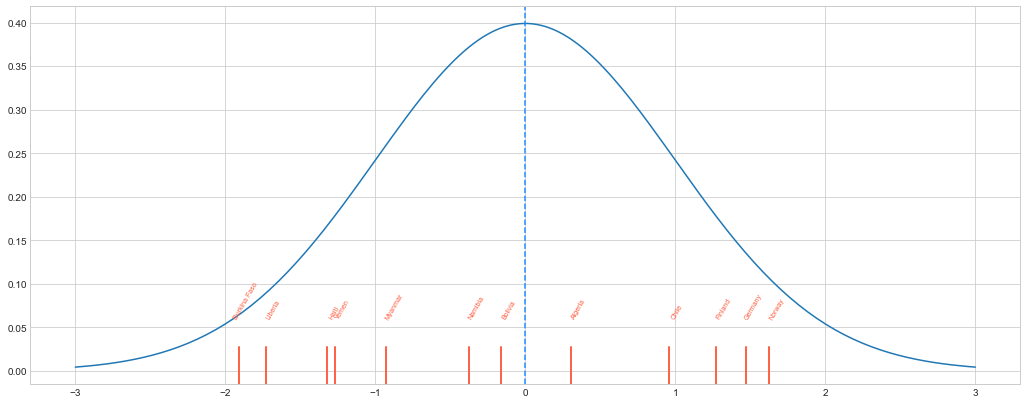

In [59]:
# generamos un array lineal 
x_axis = np.linspace(-3, 3, 200) 
# simulamos la función de densidad
plt.plot(x_axis, stats.norm.pdf(x_axis, 0, 1)) 
# marcamos la media en 0
plt.axvline(0, color='dodgerblue', linestyle='--')
plt.subplots_adjust(top = 1, right = 1.5) 

# Pasamos un array de casos a visualizar en un loop. 
# # donde para cada elemento de éste array
for i in ['Chile', 'Burkina Faso', 'Haiti', 'Myanmar', 'Germany', 'Norway', 'Finland', 'Yemen', 'Bolivia', 'Algeria', 'Namibia', 'Liberia']:
# aplicaremos la función point_zscore 
    point_zscore('undp_hdi', i)

Posterior a graficar nuestra distribución normal estandarizada, pasaremos una lista donde posicionamos una serie de países en cuanto a sus desviaciones estándares. Intentamos agregar una cantidad variada de países, para ver los correlatos desarrollados en nuestro análisis.
En el rango inferior de nuestra distribución encontramos países de la zona subsahariana del África como Burkina Faso, Liberia y Namibia, países caracterizados por guerrillas caudillistas y fragilidad institucional.

En el extremo opuesto encontramos a países asociados al Estado de Bienestar escandinavo como Noruega, Finlandia y países como Alemania.

#### **`Variables discretas: Ensayo de Bernoulli`**

Hasta ahora sabemos trabajar cuando las variables representan mediciones contínuas. Resulta que muchas veces nuestros objetivos a analizar presentan categorías y sus números son representaciones conceptuales.

Para ello nos valemos de las variables aleatorias discretas, que permiten resumir el comportamiento de un fenómeno mediante el conteo (a diferencia de las variables aleatorias continuas que permiten resumir el comportamiento de un fenómeno mediante la medición).

La distribución de una variable aleatoria X generalmente se especifica mediante un listado de todos los posibles valores y una función de probabilidad de masa p(x).

**`p(x) = px(x) = Pr[X = x]`**

##### **Ensayo de Bernoulli**

Tomemos la siguiente situación: Como investigadores nos preguntan por la estabilidad democrática a nivel mundial. Para esto emplearemos la variable **`gol_inst`**, que mide el tipo de régimen en cada una de las observaciones.

Nuestro objetivo es desarrollar una variable binaria, donde asignaremos la etiqueta '**`Democracia`**' para todos aquellos casos que presenten alguna variante de democracia (régimen parlamentario, presidencial o semipresidencial), y '**`No Democracia`**' para todos los casos que no sean democracias.

**`numpy`** ofrece el operador ternario **`np.where()`**, el cual nos facilita la reconversión de valores en base a la satisfacción de un criterio.

La sintaxis de **`np.where()`** consta de tres partes:

> **np.where**(**<condición>**, **<valor_positivo>**, **<valor_negativo>**)

-	**`<condición>`** hace referencia a un criterio formalizado en alguna expresión booleana que evalúe en verdaderos o falsos.
-	**`<valor_positivo>`** es el valor que tomarán aquellos elementos que satisfagan la condición.
-	**`<valor_negativo>`** es el valor que tomarán aquellos elementos que no satisfagan la condición.

Sabemos que en la variable las **`democracias`** tienen un número asignado entre el **`0`** y el **`2`**, y que las **`dictaduras`** tienen números entre el **`3`** y el **`5`**.
 
Para utilizar **`np.where`**, desarrollamos la condición booleana **`df['gol_inst'] <= 2`** para evaluar como '**`Democracia`**' todos aquellos casos menores o iguales a 2 y '**`No democracia`**' los demás.

In [60]:
# Proporciones de cada tipo de gobierno en el dataset 
df['democracies'] = np.where(df['gol_inst'] <= 2, 'Democracia', 'No Democracia')
# pidamos los porcentajes de democracias
democount = df['democracies'].value_counts('%').round(2) 
democount

Democracia       0.65
No Democracia    0.35
Name: democracies, dtype: float64

In [61]:
# Conteo de tipos de gobierno en el dataset 
df['democracies'].value_counts()

Democracia       127
No Democracia     67
Name: democracies, dtype: int64

Acorde a nuestro criterio de recodificación, 127 observaciones se clasificaron como regímenes con tendencias democráticas y 67 como regímenes con tendencias autoritarias. El objeto democount que creamos nos puede servir para generar un gráfico de barras.

(array([0, 1]), [Text(0, 0, 'Democracia'), Text(1, 0, 'No Democracia')])

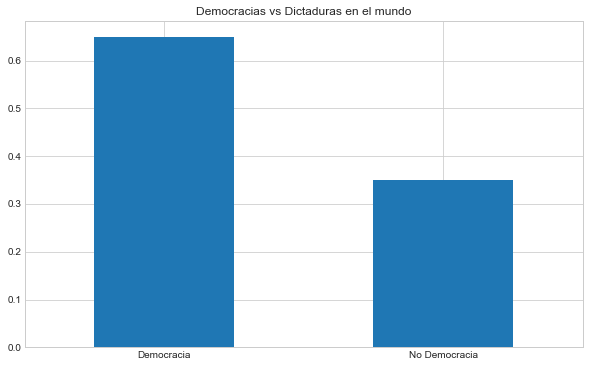

In [62]:
democount.plot(kind = 'bar') 
plt.title("Democracias vs Dictaduras en el mundo") 
plt.xticks(rotation = 'horizontal')

Observamos que el **`65.4%`** de las observaciones son clasificadas como democracias. Si tomamos un país al azar de los registrados en el dataset, **hay un 65% de probabilidad de que el país sea una variante del régimen democrático**.

Para sustentar este enunciado, es necesario respaldarnos en las leyes estadísticas. ¿Cómo podemos hacerlo?

Acorde a esta variable, un país sólo puede ser **`democracia`** o **`dictadura`**.

Sabemos que la probabilidad de suceso de un evento es **`P`**. Por tanto, su tasa de ausencia está definida como **`Q = (1 − P )`**.

La distribución Bernoulli (también llamada ensayo de Bernoulli) representa un caso individual donde se realiza un ensayo con **`x ε [0, 1]`**. Está gobernada por un parámetro continuo **`ε [0, 1]`** que representa la probabilidad de **`x = 1`**.

Podemos solicitar los primeros momentos de un ensayo de Bernoulli en el módulo **`scipy.stats`** mediante la función **`bernoulli.stats`**, donde ingresando nuestra probabilidad obtenemos nuestra media y varianza.

In [64]:
mu, sigma = stats.bernoulli.stats(0.65)
print("La media del ensayo de Bernoulli es de: ", mu.round(2)) 
print("La varianza del ensayo de Bernoulli es de: ", sigma.round(2)) 
print("La probabilidad de ocurrencia asumiendo una desviación estandar se encuentra entre :", round(mu - sigma, 2), round(mu + sigma, 2))

La media del ensayo de Bernoulli es de:  0.65
La varianza del ensayo de Bernoulli es de:  0.23
La probabilidad de ocurrencia asumiendo una desviación estandar se encuentra entre : 0.42 0.88


#### **10 - Ley de los grandes números**

Ley de los grandes números

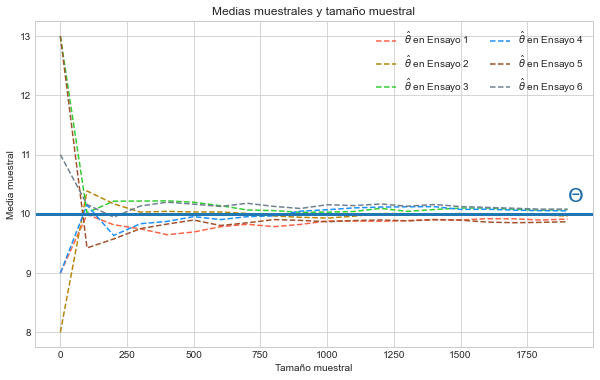

In [8]:
colors = ['tomato','darkgoldenrod','limegreen','dodgerblue','sienna','slategray']
def law_large_numbers(function = np.random.poisson, sample_size=2000, Theta=10):
    np.random.seed(2)
    for i in range(len(colors)):
        sample = function(Theta, size=sample_size)
        x_span = range(1, sample_size, 100)
        sample_average = [sample[:j].mean() for j in x_span]
        plt.plot(x_span, sample_average, lw=1.5, label=r'$\hat\theta$ en Ensayo {}'.format(i+1), 
                 color=colors[i], linestyle='--')

    plt.title('Medias muestrales y tamaño muestral')        
    plt.ylabel('Media muestral')
    plt.xlabel('Tamaño muestral')
    plt.axhline(Theta, lw=3)
    plt.annotate(r'$\Theta$', xy = (sample_size - 100, Theta + 0.2), fontsize=20, color='#1c6cab')
    plt.legend()

law_large_numbers()
plt.legend(loc='best', ncol=2)

<center><img src="https://i.postimg.cc/d090SMJX/Screenshot-5.png"></center>